<a href="https://colab.research.google.com/github/satriakipang/Proyek-Pertama-Predictive-Analytics-Dicoding/blob/main/Proyek_Pertama_Predictive_Analytics_Dicoding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Instal dan import library



In [1]:
#Instal requirement yang di butuhkan 
!pip install wget
!pip install opendatasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import sklearn
import opendatasets
import wget
import zipfile
from tqdm import tqdm
import os

In [3]:
os.environ['Your Kaggle username:'] = "fransiskusricardo"
os.environ['Your Kaggle Key:'] = "e178a4405fe43a23694788cd680b92fe"

#2. Load Dataset

In [4]:
if os.path.exists('diabetes-dataset/diabetes.csv'):
  print("file sudah ada")
else:
  opendatasets.download_kaggle_dataset(dataset_url='https://www.kaggle.com/datasets/akshaydattatraykhare/diabetes-dataset', data_dir='')

file sudah ada


In [5]:
data = pd.read_csv("diabetes-dataset/diabetes.csv")
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [6]:
data.shape

(768, 9)

#3. Data understanding

Informasi data:

Attribute  | Keterangan
------------- | -------------
Sumber | https://www.kaggle.com/datasets/akshaydattatraykhare/diabetes-dataset
Pregnancies | merepresentasikan Jumlah kehamilan
Glucose | merepresentasikan  tingkat Glukosa dalam darah
BloodPressure | merepresentasikan pengukuran tekanan darah 
SkinThickness | merepresentasikan ketebalan kulit
Insulin | merepresentasikan tingkat Insulin dalam darah       
BMI | merepresentasikan indeks massa tubuh
DiabetesPedigreeFunction  | merepresentasikan persentase diabetes
Age |merepresentasikan umur
Outcome |merepresentasikan hasil akhir 1 adalah diabetes dan 0 adalah Tidak diabetes 

## 3.1. Mengecek tipe variabel pada data

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## 3.2. Melihat jumlah data

In [8]:
print("Jumlah baris          :", data.shape[0])
print("Jumlah kolom          :", data.shape[1])

Jumlah baris          : 768
Jumlah kolom          : 9


Data diabetes terdiri dari 768 baris, dan 9 kolom

## 3.3. Mengecek missing values

In [9]:
pd.DataFrame({
    'missing value':data.isnull().sum()
})

,missing value
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


Data diabetes tidak memiliki missing values untuk setiap kolomnya

###3.4. Mengecek double duplicated data

In [10]:
data[data.duplicated()]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


Hasil yang di peroleh adalah tidak ada data yang duplicated

## 3.5. Deskripsi statstik data

In [11]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Fungsi describe() memberikan informasi statistik pada masing-masing kolom, antara lain:

- **Count**  adalah jumlah sampel pada data.
- **Mean** adalah nilai rata-rata.
- **Std** adalah standar deviasi.
- **Min** yaitu nilai minimum setiap kolom. 
- **25%** adalah kuartil pertama. Kuartil adalah nilai yang menandai batas interval dalam empat bagian sebaran yang sama. 
- **50%** adalah kuartil kedua, atau biasa juga disebut median (nilai tengah).
- **75%** adalah kuartil ketiga.
- **Max** adalah nilai maksimum.

---
**Interpertasi Deskripsi statstik data**


Pada Kolom Glucose,	BloodPressure,	SkinThickness,	Insulin,	dan BMI memiliki nilai minimum yaitu 0. Hal tersebut tidak mungkin, sebab manusia tidak dapat mencapai nol untuk kadar glukosa, tekanan darah, ketebalan kulit, kadar insulin, dan BMI. Maka nilai nol pada kolom tersebut akan dihapus

In [12]:
data = data.loc[(data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']]!=0).all(axis=1)]

In [13]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,3.301020,122.627551,70.663265,29.145408,156.056122,33.086224,0.523046,30.864796,0.331633
std,3.211424,30.860781,12.496092,10.516424,118.841690,7.027659,0.345488,10.200777,0.471401
min,0.000000,56.000000,24.000000,7.000000,14.000000,18.200000,0.085000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,21.000000,76.750000,28.400000,0.269750,23.000000,0.000000
50%,2.000000,119.000000,70.000000,29.000000,125.500000,33.200000,0.449500,27.000000,0.000000
75%,5.000000,143.000000,78.000000,37.000000,190.000000,37.100000,0.687000,36.000000,1.000000
max,17.000000,198.000000,110.000000,63.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [14]:
data.shape

(392, 9)

##3.6. Visualisasi data

###3.6.1. Kolom Pregnancies, dan  Outcome 

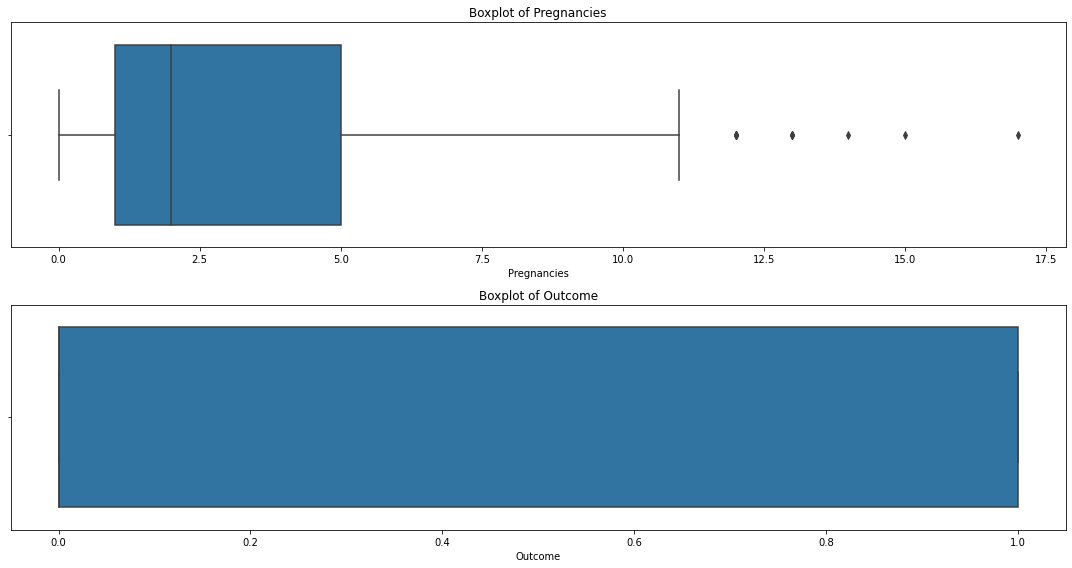

In [15]:
data_cols = ['Pregnancies', 'Outcome']
plt.figure(figsize = (15,8))
for i in range(len(data_cols)):
  plt.subplot(len(data_cols), 1, i + 1)  # i Rows , 1 cols 
  sns.boxplot(x = data[data_cols[i]])
  plt.title('Boxplot of {}'.format(data_cols[i]))
  plt.tight_layout()

###3.6.2. Kolom Glucose, BloodPressure, dan SkinThickness

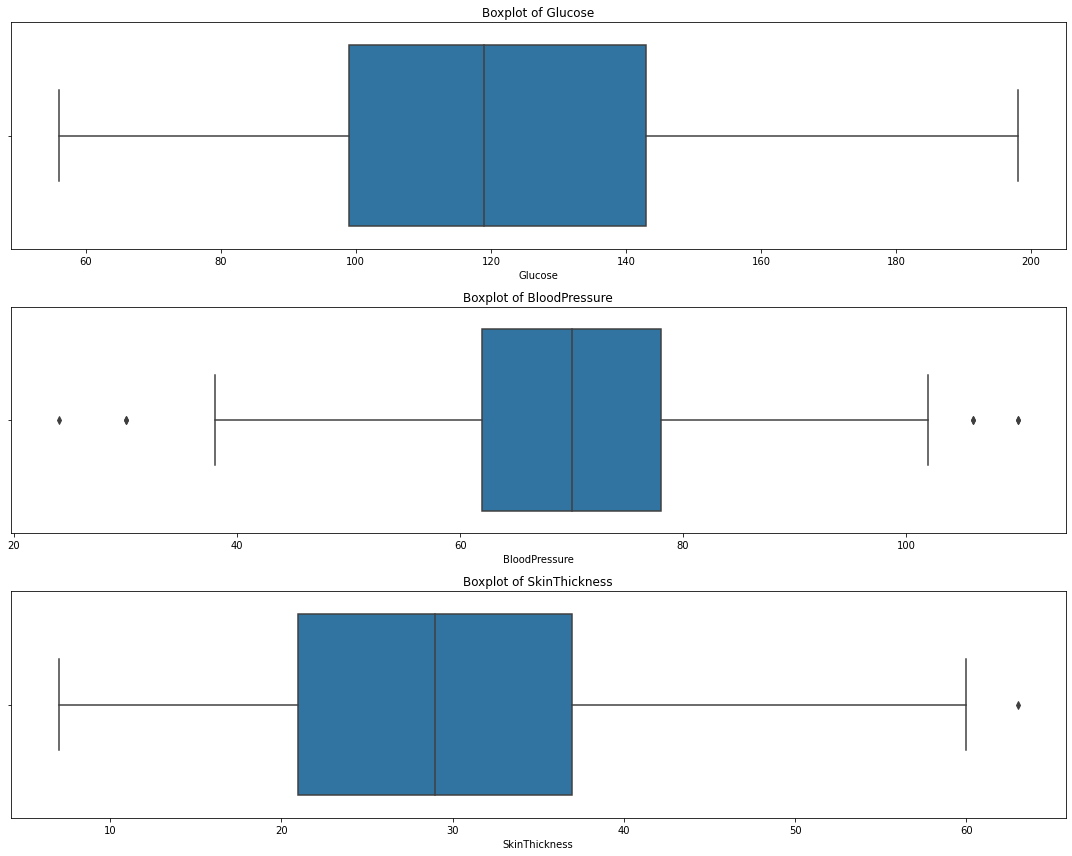

In [16]:
data_cols = ['Glucose',	'BloodPressure', 'SkinThickness']
plt.figure(figsize = (15,12))
for i in range(len(data_cols)):
  plt.subplot(3, 1, i + 1)  # 3 Rows , 1 cols 
  sns.boxplot(x = data[data_cols[i]])
  plt.title('Boxplot of {}'.format(data_cols[i]))
  plt.tight_layout()

### 3.6.3. Kolom Insulin, BMI, DiabetesPedigreeFunction, Age

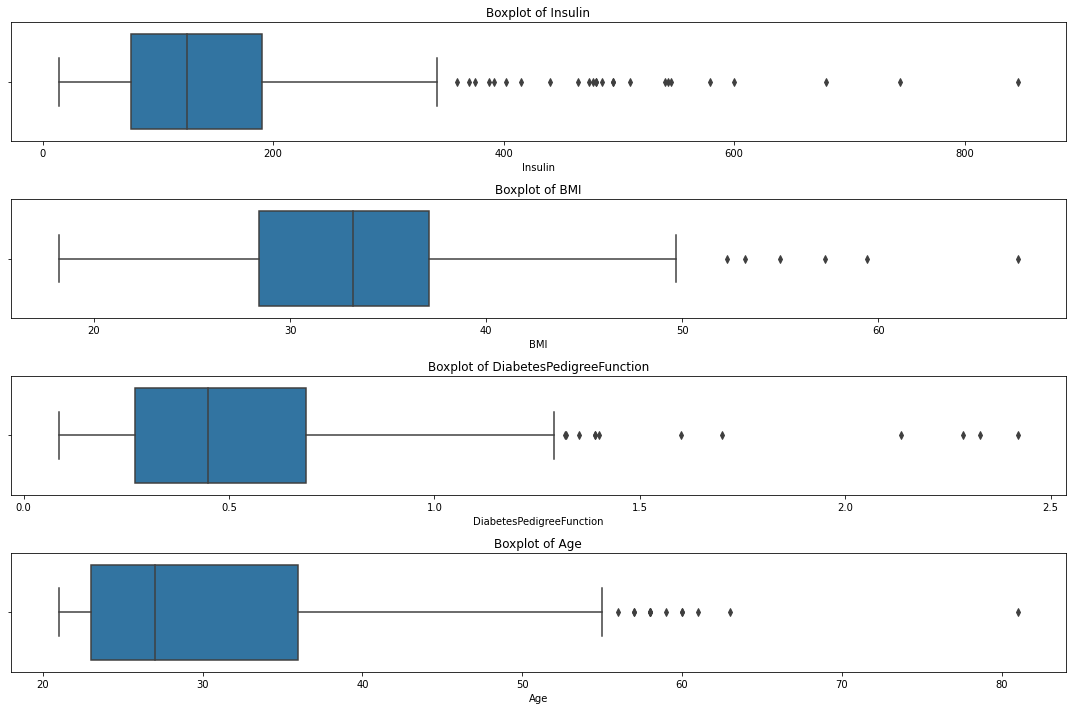

In [17]:
data_cols = ['Insulin',	'BMI', 'DiabetesPedigreeFunction',	'Age']
plt.figure(figsize = (15,12))

for i in range(len(data_cols)):
  plt.subplot(5, 1, i + 1)  # 3 Rows , 1 cols 
  sns.boxplot(x = data[data_cols[i]])
  plt.title('Boxplot of {}'.format(data_cols[i]))
  plt.tight_layout()

###3.6.4. Interpretasi Outlier pada Boxplot.

- Pada boxplot Pregnancies, plot menunjukkan outlier untuk jumlah kehamilan 13,15, 16, dan 17, data tersebut tidak dihapus karena seorang wanita mungkin melahirkan 17 anak.
- Pada boxplot Insulin, kadar insulin cukup berfluktuasi. Maka, tidak akan dianggap sebagai outlier
- Pada boxplot DiabetesPedigreeFunction, nilainya bervariasi berdasarkan riwayat keluarga. Maka, tidak akan menghapusnya.
- Pada boxplot Age, nilai umur terdapat outlier tetapi orang dengan usia seperti itu bisa ada. Maka, tidak akan dihapus.

##3.6. Menghapus outlier

Pada interpertasi Outlier pada Boxplot didapatkan data tidak dihapus, maka langkah ini di lewati

In [18]:
"""
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR=Q3-Q1
data=data[~((data<(Q1-1.5*IQR))|(data>(Q3+1.5*IQR))).any(axis=1)]
"""

'\nQ1 = data.quantile(0.25)\nQ3 = data.quantile(0.75)\nIQR=Q3-Q1\ndata=data[~((data<(Q1-1.5*IQR))|(data>(Q3+1.5*IQR))).any(axis=1)]\n'

In [19]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1
13,1,189,60,23,846,30.1,0.398,59,1
...,...,...,...,...,...,...,...,...,...
753,0,181,88,44,510,43.3,0.222,26,1
755,1,128,88,39,110,36.5,1.057,37,1
760,2,88,58,26,16,28.4,0.766,22,0
763,10,101,76,48,180,32.9,0.171,63,0


#4. Univariate Analysis

Pertama, akan dibagi fitur pada dataset menjadi dua bagian, yaitu numerical features dan categorical features.

In [20]:
numerical_features = ['Glucose',	'BloodPressure',	'SkinThickness',	'Insulin',	'BMI',	'DiabetesPedigreeFunction',	'Age']
categorical_features = ['Pregnancies','Outcome']

##4.1. Categorical Features

###4.1.1 Fitur Pregnancies

    jumlah sampel  persentase
1              93        23.7
2              64        16.3
0              56        14.3
3              45        11.5
4              27         6.9
5              21         5.4
7              20         5.1
6              19         4.8
8              14         3.6
9              11         2.8
10              6         1.5
11              5         1.3
12              5         1.3
13              3         0.8
15              1         0.3
17              1         0.3
14              1         0.3


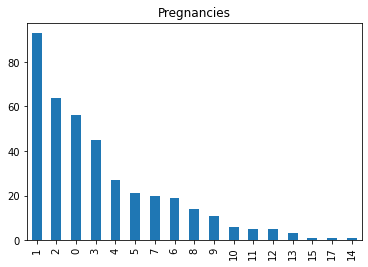

In [21]:
feature = categorical_features[0]
count = data[feature].value_counts()
percent = 100*data[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

Melihat hasil data dan tidak ada korelasinya maka kolom data ini di hapus 

In [22]:
data.drop('Pregnancies', axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


###4.1.2 Fitur Outcome

   jumlah sampel  persentase
0            262        66.8
1            130        33.2


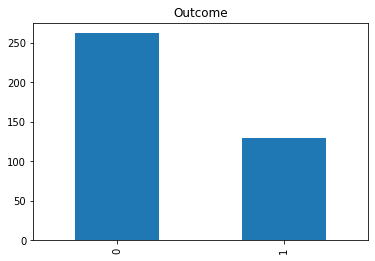

In [23]:
feature = categorical_features[1]
count = data[feature].value_counts()
percent = 100*data[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

##4.2. Numerical Features

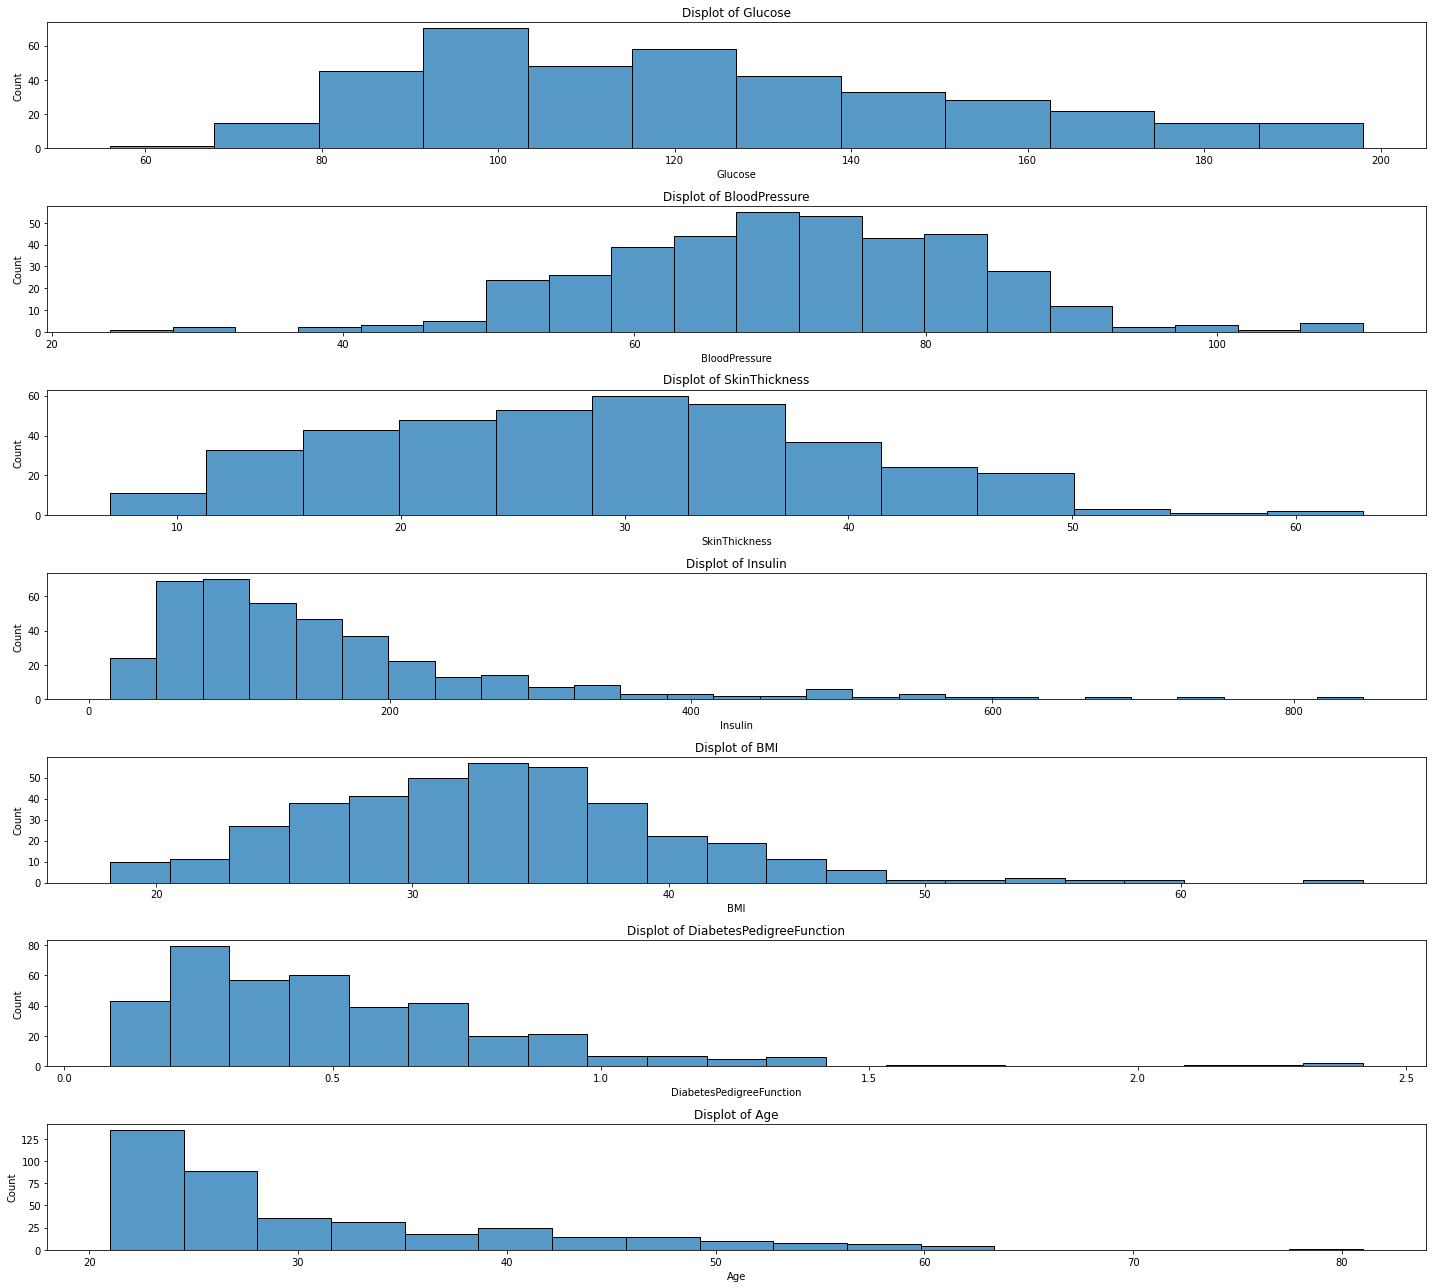

In [24]:
plt.figure(figsize = (20,18))

for i in range(len(numerical_features)):
    plt.subplot(len(numerical_features), 1, i + 1)  # 2 Rows , 2 cols 
    sns.histplot(x = data[numerical_features[i]])
    plt.title('Displot of {}'.format(numerical_features[i]))
    plt.tight_layout()

Interpretasi histogram
- Beberapa kolom berdistribusi miring ke kanan
- Distribusi kolom yang berdistribusi normal adalah Glucose, BloodPressure, SkinThickness dan BMI.
- Distribusi harga miring ke kanan (right-skewed). adalah Insulin, DiabetesPedigreeFunction dan Age.

#5. Multivariate Analysis

In [25]:
data

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
3,89,66,23,94,28.1,0.167,21,0
4,137,40,35,168,43.1,2.288,33,1
6,78,50,32,88,31.0,0.248,26,1
8,197,70,45,543,30.5,0.158,53,1
13,189,60,23,846,30.1,0.398,59,1
...,...,...,...,...,...,...,...,...
753,181,88,44,510,43.3,0.222,26,1
755,128,88,39,110,36.5,1.057,37,1
760,88,58,26,16,28.4,0.766,22,0
763,101,76,48,180,32.9,0.171,63,0


In [26]:
data.shape

(392, 8)

## 5.1. Melihat Hubungan Antara Numerical Features Dengan Fungsi Tujuan Yaitu Outcome

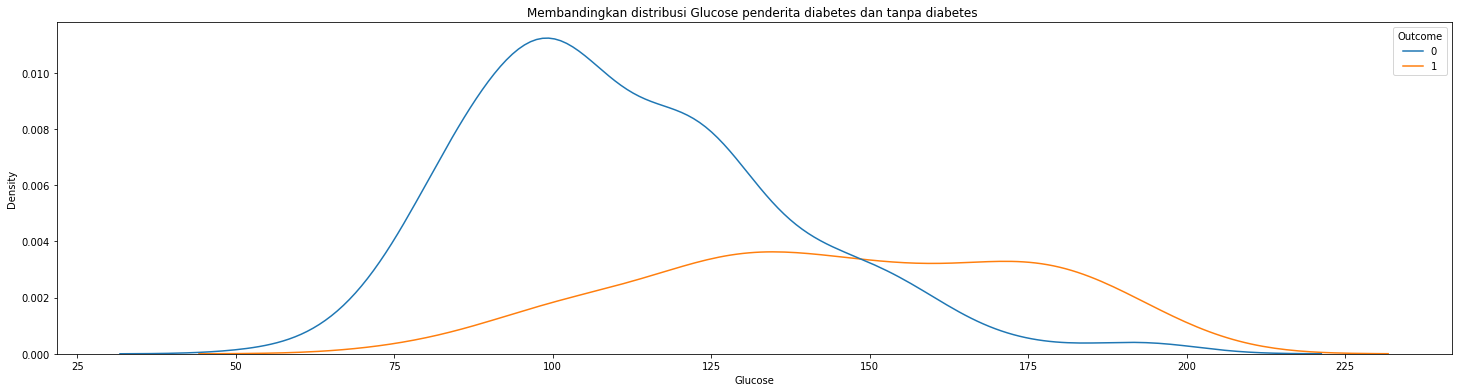

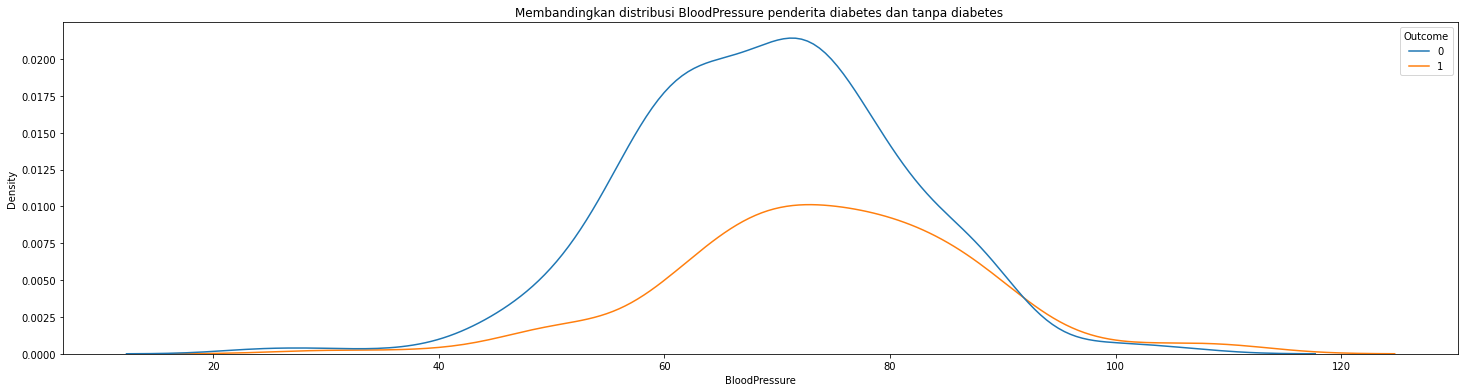

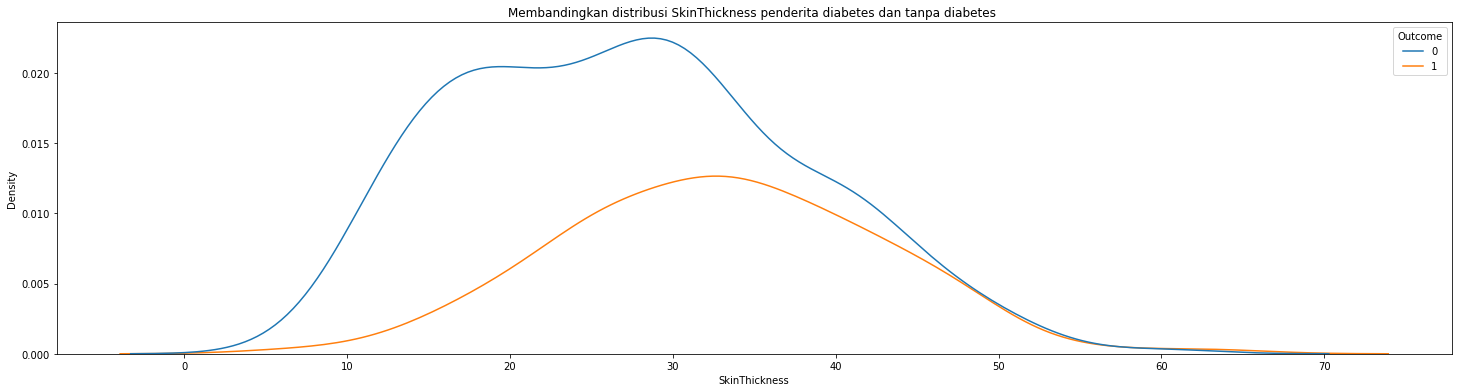

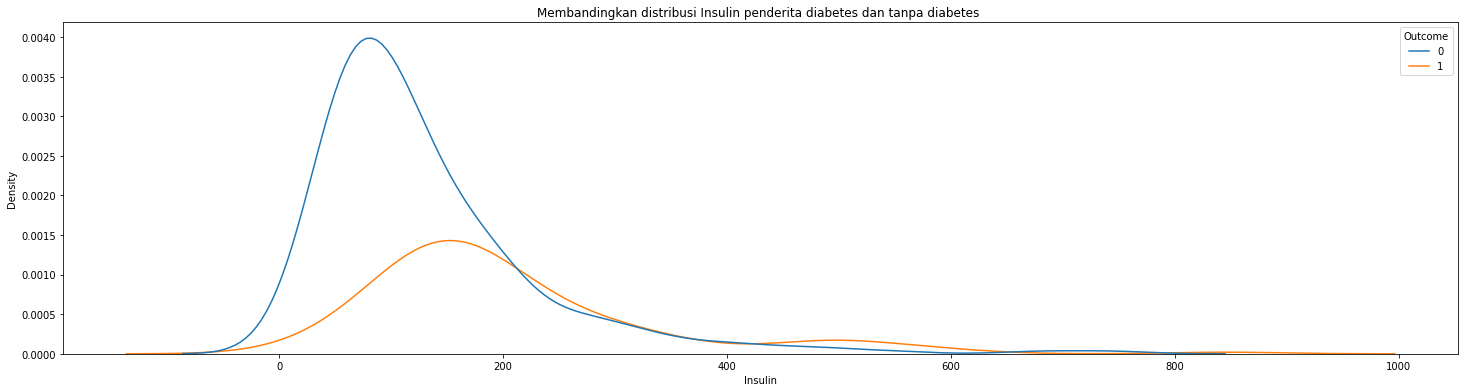

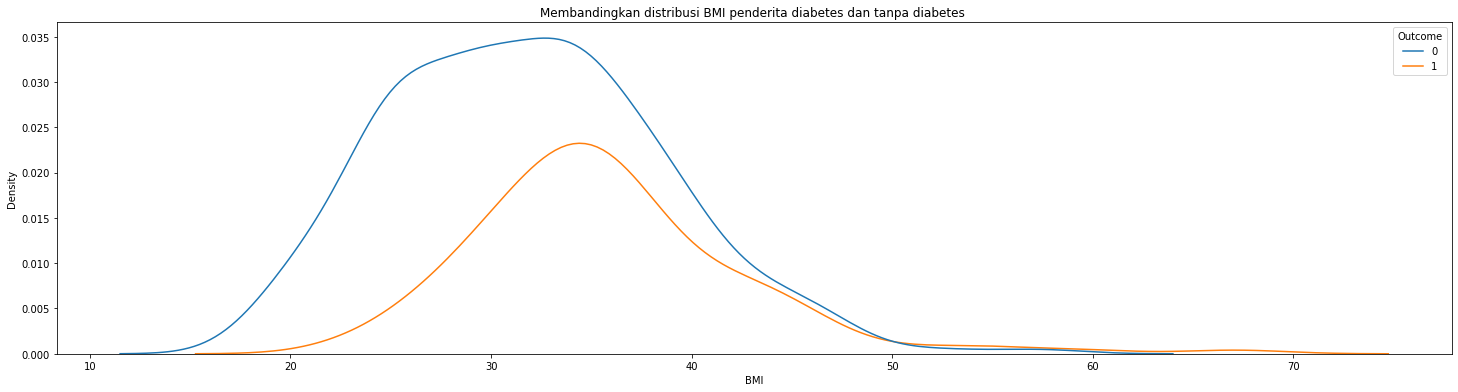

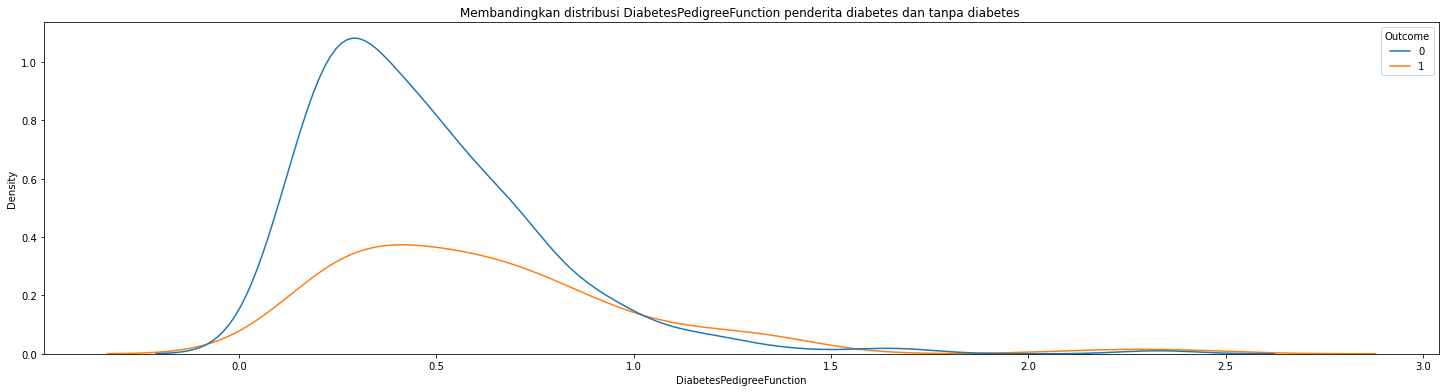

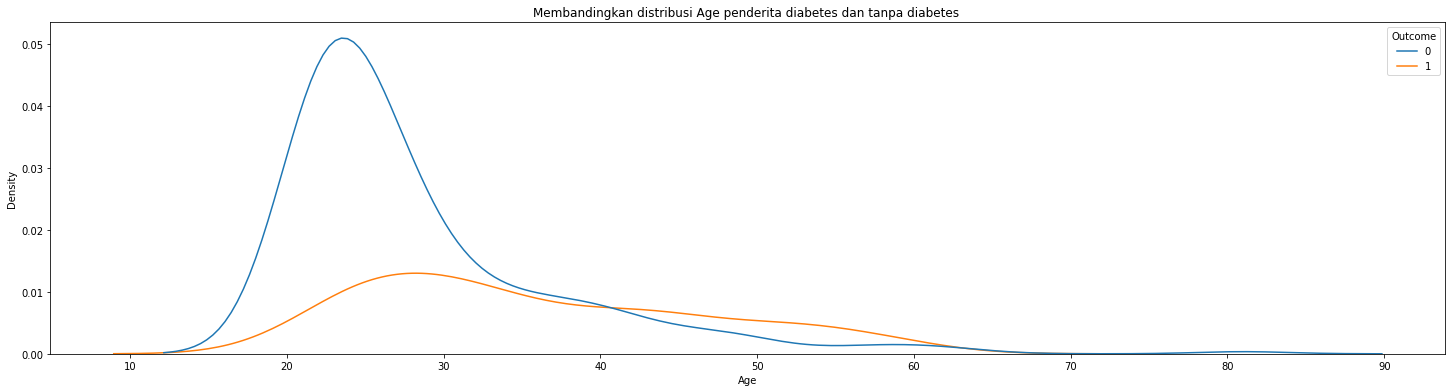

In [27]:
for i in range(len(numerical_features)):
    plt.figure(figsize = (25,50))
    plt.subplot(len(numerical_features), 1, i + 1) 
    sns.kdeplot(x=data[numerical_features[i]], hue='Outcome',data=data)
    plt.title('Membandingkan distribusi {} penderita diabetes dan tanpa diabetes '.format(numerical_features[i]))
    plt.show()
    print('\n')


---------------------------
**Interpertasi**

Pada grafik perbandingan terdapat perbedaan yang terkena diabetes dan tidak diabetes, yaitu pada Glucose, BloodPressure, BMI, DiabetesPedigreeFunction, Age. 




--------
**Kesimpulan**

Pada data tersebut kita bisa melihat bahwa ciri ciri pasien yang menderita diabetes memiliki kriteria yaitu :
- Pasien yang memiliki glucose tinggi
- Pasien yang memiliki BloodPressure tinggi
- Pasien yang memiliki BMI tinggi
- Pasein yang memiliki DiabetesPedigreeFunction tinggi
- Pasien yang memiliki Age lebih tua


##5.2 Heat Map

Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik ')

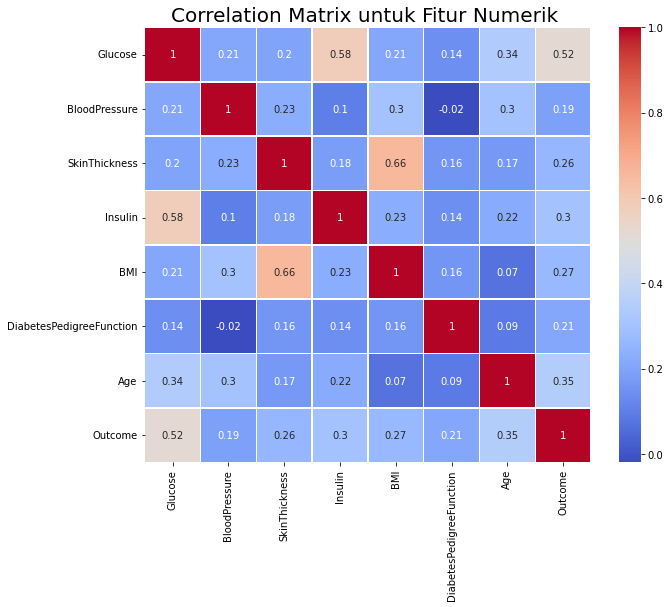

In [28]:
plt.figure(figsize=(10, 8))
correlation_matrix = data.corr().round(2)
 
# Untuk menge-print nilai di dalam kotak, gunakan parameter anot=True
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)

-----
**Interpertasi**

Pada hasil heat map dapat dilihat bahwa diabetes berkorelasi dengan glucose, bmi dan age.


#6. Data Preparation

Balancing Dataset

In [29]:

data_majority_0 = data[(data['Outcome']==0)] 
data_minority_1 = data[(data['Outcome']==1)] 


data_minority_upsampled = sklearn.utils.resample(data_minority_1, 
                                 replace=True,    
                                 n_samples= 260, 
                                 random_state=42) 

data = pd.concat([data_minority_upsampled, data_majority_0])

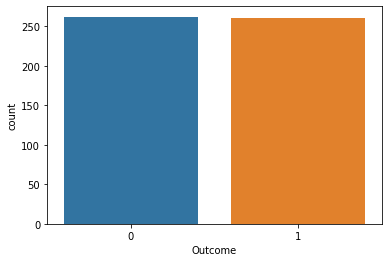

In [30]:
sns.countplot(x=data['Outcome'])

In [31]:
from sklearn.model_selection import train_test_split

X= data.drop(columns="Outcome")
y = data["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, shuffle=True, random_state=100)

# 7. Model Development 

##7.1. K-Nearest Neighbor



In [32]:
from sklearn.neighbors import KNeighborsClassifier
 
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=2)

## 7.2. Random Forest

In [33]:
# Impor library yang dibutuhkan
from sklearn.ensemble import RandomForestClassifier

# buat model prediksi
RF = RandomForestClassifierModel = RandomForestClassifier(criterion = 'gini',n_estimators=100,max_depth=9,random_state=44) 
RF.fit(X_train, y_train)

RandomForestClassifier(max_depth=9, random_state=44)

##7.3. Boosting Algorithm

In [34]:
from sklearn.ensemble import AdaBoostClassifier
 
boosting = AdaBoostClassifier()                            
boosting.fit(X_train, y_train)


AdaBoostClassifier()

#8. Evaluasi Model

In [35]:
# Siapkan dataframe untuk analisis model
models = [knn, RF, boosting]
models_names= ["KNearestNeighbor","Random Forest","Boosting"]
mean_score = []

In [36]:
for model in models:
    cross_score = sklearn.model_selection.cross_val_score(model,X_train,y_train,cv=5)
    average_score = np.mean(cross_score)
    mean_score.append(average_score)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


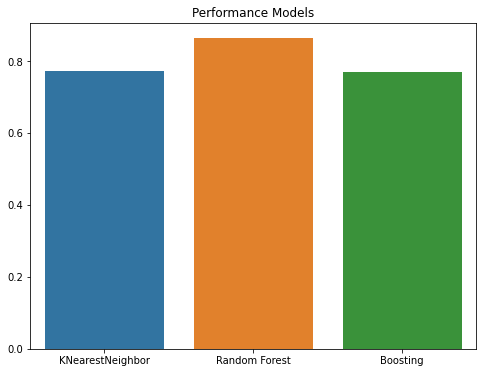

In [37]:
# Diagram Performances Models

plt.figure(figsize=(8,6))
sns.barplot(models_names,mean_score)
plt.title("Performance Models")
plt.show()

Pada diagram Permormance Models, Random Forest memiliki performance yang sangat baik. Maka kita akan gunakan Random Forest

In [38]:
print('Train RandomForestClassifierModel  : ' , RF.score(X_train, y_train))
print('Test RandomForestClassifierModel : ' , RF.score(X_test, y_test))

Train RandomForestClassifierModel  :  0.9952038369304557
Test RandomForestClassifierModel :  0.9238095238095239


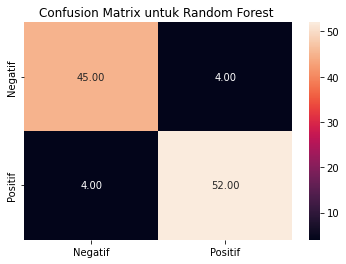

In [39]:
y_pred_RF = RandomForestClassifierModel.predict(X_test)
RF = sklearn.metrics.confusion_matrix(y_test,y_pred_RF)

ax=sns.heatmap(RF,annot=True,fmt=".2f")
ax.set_xticklabels(["Negatif", "Positif"])
ax.set_yticklabels(["Negatif", "Positif"])
plt.title("Confusion Matrix untuk Random Forest ")
plt.show()